In [1]:
#site: https://github.com/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [2]:
config = Cfg.load_config_from_name('vgg_transformer')
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cpu'

In [3]:
detector = Predictor(config)

/home/zaibachkhoa/Documents/detect_handwritting_number/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zaibachkhoa/Documents/detect_handwritting_number/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/zaibachkhoa/Documents/detect_handwritting_number/venv/lib/python3.8/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False 

In [4]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2024-01-10 13:29:46--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip’

sample.zip          100%[===================>] 298,80K   263KB/s    in 1,1s    

2024-01-10 13:29:48 (263 KB/s) - ‘sample.zip’ saved [305969/305969]



AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

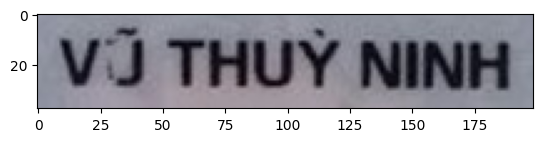

In [5]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

In [7]:
import vietocr
print(vietocr.__version__)

AttributeError: module 'vietocr' has no attribute '__version__'

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# from models import SimpleModel
model = SimpleModel().to(device)

In [8]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
num_steps = len(train_loader)

for epoch in range(num_epochs):

    # ---------- TRAINING ----------
    # set model to training
    model.train()

    total_loss = 0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward
        outputs = model(images)

        # Compute Loss
        loss = criterion(outputs, labels)

        # Backward
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Print Log
        if (i + 1) % 100 == 0:
            print("Epoch {}/{} - Step: {}/{} - Loss: {:.4f}".format(
                    epoch, num_epochs, i, num_steps, total_loss / (i + 1)))

    # ---------- VALIDATION ----------
    # set model to evaluating
    model.eval()

    val_losses = 0

    with torch.no_grad():
        correct = 0
        total = 0
        for _, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)

            _, predicted = torch.max(outputs, 1)

            loss = criterion(outputs, labels)

            val_losses += loss.item()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print("Epoch {} - Accuracy: {} - Validation Loss : {:.4f}".format(
                epoch,
                correct / total,
                val_losses / (len(val_loader))))

Epoch 0/20 - Step: 99/1875 - Loss: 0.0602
Epoch 0/20 - Step: 199/1875 - Loss: 0.0565
Epoch 0/20 - Step: 299/1875 - Loss: 0.0578
Epoch 0/20 - Step: 399/1875 - Loss: 0.0569
Epoch 0/20 - Step: 499/1875 - Loss: 0.0574
Epoch 0/20 - Step: 599/1875 - Loss: 0.0561
Epoch 0/20 - Step: 699/1875 - Loss: 0.0564
Epoch 0/20 - Step: 799/1875 - Loss: 0.0577
Epoch 0/20 - Step: 899/1875 - Loss: 0.0598
Epoch 0/20 - Step: 999/1875 - Loss: 0.0596
Epoch 0/20 - Step: 1099/1875 - Loss: 0.0594
Epoch 0/20 - Step: 1199/1875 - Loss: 0.0589
Epoch 0/20 - Step: 1299/1875 - Loss: 0.0587
Epoch 0/20 - Step: 1399/1875 - Loss: 0.0588
Epoch 0/20 - Step: 1499/1875 - Loss: 0.0587
Epoch 0/20 - Step: 1599/1875 - Loss: 0.0585
Epoch 0/20 - Step: 1699/1875 - Loss: 0.0586
Epoch 0/20 - Step: 1799/1875 - Loss: 0.0584
Epoch 0 - Accuracy: 0.982 - Validation Loss : 0.0552
Epoch 1/20 - Step: 99/1875 - Loss: 0.0535
Epoch 1/20 - Step: 199/1875 - Loss: 0.0502
Epoch 1/20 - Step: 299/1875 - Loss: 0.0490
Epoch 1/20 - Step: 399/1875 - Loss: 0.

In [13]:
for stt, images in enumerate((
        'photo_6118490984477211115_y.jpg',
        'photo_6118490984477211116_y.jpg',
        'photo_6118490984477211117_y.jpg',
        'photo_6118490984477211118_y.jpg',
        'photo_6118490984477211119_y.jpg',
        'photo_6118490984477211120 _y.jpg',
        "digit.jpg",
)):
# for _, (images, labels) in enumerate(val_loader):
# # val_loader = torch.utils.data.DataLoader(
# #         datasets.MNIST("data", train=False, download=True,
# #                        transform=transforms.Compose([
# #                                transforms.ToTensor(),
# #                                transforms.Normalize((0.1307, ), (0.3081, )),
# #                                ])),
# #         batch_size=batch_size,
# #         shuffle=False)
# from torchvision.datasets import ImageFolder
# trainDataset = ImageFolder(root=config.TRAIN,
#         transform=trainTransforms)
# trainDataLoader = DataLoader(trainDataset, 
#         batch_size=config.BATCH_SIZE, shuffle=True)
    images = images.to(device)
    outputs = model(images)

    _, predicted = torch.max(outputs, 1)
    print(predicted)

AttributeError: 'str' object has no attribute 'to'